In [1]:
import os
import pandas as pd
import numpy as np
import geopandas as gpd

from shapely.geometry import Point

from pyogrio import read_dataframe, write_dataframe

from sklearn.neighbors import BallTree

import warnings
import seaborn as sns
import scipy.stats as stats

warnings.filterwarnings('ignore')

In [2]:
fp = "./data/dem30_sfl_point.shp"
Geodata0 = read_dataframe(fp)
print( Geodata0.columns )

Geodata01 = Geodata0.copy()

Index(['pointid', 'grid_code', 'category1', 'category2', 'category3',
       'category4', 'category5', 'geometry'],
      dtype='object')


In [3]:
Geodata0['x'] = Geodata0.geometry.get_coordinates().x
Geodata0['y'] = Geodata0.geometry.get_coordinates().y

In [4]:
#Geodata0['dem_03mslr'] = Geodata0['grid_code'] + 0.3

Geodata0.loc[ Geodata0[  'category1'] < 0 ,  'category1' ] = 0
Geodata0.loc[ Geodata0[  'category2'] < 0 ,  'category2' ] = 0
Geodata0.loc[ Geodata0[  'category3'] < 0 ,  'category3' ] = 0
Geodata0.loc[ Geodata0[  'category4'] < 0 ,  'category4' ] = 0
Geodata0.loc[ Geodata0[  'category5'] < 0 ,  'category5' ] = 0


print( Geodata0['category1'] .unique() )
print( Geodata0['category2'] .unique() )
print( Geodata0['category3'] .unique() )
print( Geodata0['category4'] .unique() )
print( Geodata0['category5'] .unique() )


[ 0 10 11  9  8  7  6  5  4  2  1  3 12]
[ 0 14 15 13 12 11 10  9  8  7  6  4  2  1  3  5 16]
[ 0 17 18 16 15 14 13 12 11 10  9  8  6  4  2  1  3  5  7 19 20]
[ 0 21 20 19 18 17 16 15 14 13 12 10  9  6  4  1  2  3  5  7  8 11]
[ 0 21 20 19 18 17 16 15 14 13 12 10  8  5  3  4  6  7  9 11  2  1]


<Axes: >

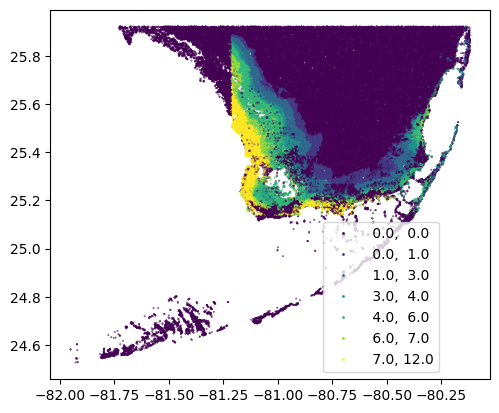

In [56]:
Geodata0.sample(n = 100000).plot(column= 'category1', 
             scheme="Quantiles", k = 20,
            #scheme = "user_defined", k = 5,
            #classification_kwds = {'bins':[0, 1, 2, 12]},
             legend = True , markersize= 0.1,
             legend_kwds = { 'loc':'lower right', 
                            'bbox_to_anchor':(0.9, 0.0), 
                            'fmt':'{:.1f}',
                            'markerscale': 0.2, 
                            'title_fontsize':'large', 
                            'fontsize':'medium'} ) 

<Axes: >

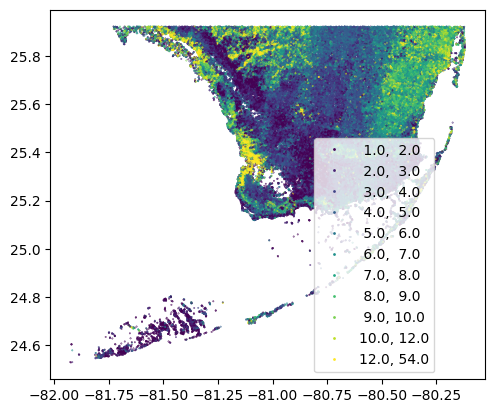

In [39]:
Geodata0.sample(n = 100000).plot(column= 'grid_code', 
             scheme="Quantiles", k = 20,
            #scheme = "user_defined", k = 5,
            #classification_kwds = {'bins':[0, 1, 2, 12]},
             legend = True , markersize= 0.1,
             legend_kwds = { 'loc':'lower right', 
                            'bbox_to_anchor':(0.9, 0.0), 
                            'fmt':'{:.1f}',
                            'markerscale': 0.2, 
                            'title_fontsize':'large', 
                            'fontsize':'medium'} ) 

In [90]:
print( Geodata0['grid_code'] .unique() )

[  1   2   3   4   5   7   8   6   9  10  11  17  14  18  19  12  16  15
  13  22  24  23  20  26  25  27  21  29  28  40  36  31  30  32  35  41
  37  34  42  33  39  38  43  44  47  46  45  48  50  49  51  54  62  56
  52  55  64  61  57  63  53  58  60  72  66  69  84 106  93  97 137 124
  79 100  77  75  68  71  67  59  82  81  70  78  65  98  99]


In [5]:
Geodata0['cate1tot'] = Geodata0['category1'] + Geodata0['grid_code'] * 3.28084
Geodata0['cate2tot'] = Geodata0['category2'] + Geodata0['grid_code'] * 3.28084
Geodata0['cate3tot'] = Geodata0['category3'] + Geodata0['grid_code'] * 3.28084
Geodata0['cate4tot'] = Geodata0['category4'] + Geodata0['grid_code'] * 3.28084
Geodata0['cate5tot'] = Geodata0['category5'] + Geodata0['grid_code'] * 3.28084

In [92]:
Geodata0[ Geodata0['category5'] > 0 ].tail()

,pointid,grid_code,category1,category2,category3,category4,category5,geometry,x,y,cate1tot,cate2tot,cate3tot,cate4tot,cate5tot
9427481,175265,9,0,1,3,6,7,POINT (-80.12319 25.91542),-80.123194,25.915417,29.52756,30.52756,32.52756,35.52756,36.52756
9427482,175266,10,0,0,1,4,5,POINT (-80.12292 25.91542),-80.122917,25.915417,32.80840,32.80840,33.80840,36.80840,37.80840
9427483,175267,9,0,0,1,4,5,POINT (-80.12264 25.91542),-80.122639,25.915417,29.52756,29.52756,30.52756,33.52756,34.52756
9427484,175268,10,0,0,0,0,2,POINT (-80.12236 25.91542),-80.122361,25.915417,32.80840,32.80840,32.80840,32.80840,34.80840
9427487,175271,6,0,0,0,0,1,POINT (-80.12153 25.91542),-80.121528,25.915417,19.68504,19.68504,19.68504,19.68504,20.68504


In [17]:
print( Geodata0['category1'] .unique() )
print( Geodata0.shape )
print( Geodata0['grid_code'].max() * 3.28084 )

[ 0 10 11  9  8  7  6  5  4  2  1  3 12]
(9427489, 15)
449.47508


In [16]:
print( Geodata0['cate1tot'] .unique() )


[  3.28084   6.56168   9.84252  13.12336  16.4042   22.96588  26.24672
  19.68504  29.52756  32.8084   36.08924  55.77428  45.93176  59.05512
  62.33596  39.37008  52.49344  49.2126   42.65092  72.17848  78.74016
  75.45932  65.6168   85.30184  82.021    88.58268  68.89764  16.56168
  19.84252  23.12336  20.84252  17.56168  13.28084  15.56168  26.4042
  22.12336  28.68504  18.84252  38.52756  35.24672  37.52756  40.8084
  34.24672  30.96588  27.68504  24.4042   33.24672  29.96588  26.68504
  23.4042   22.4042   20.12336  24.12336  25.4042   21.12336  36.52756
  32.24672  16.84252  27.4042   12.28084  41.8084   44.08924  39.8084
  14.28084  29.68504  28.96588  31.96588  25.68504  45.08924  48.37008
  19.12336  43.08924  46.37008  36.24672  32.96588  17.84252  51.65092
  54.93176  47.37008  50.65092  13.56168  30.68504  14.56168  11.28084
  10.28084  15.84252  12.56168  24.68504  18.12336  21.4042   27.96588
  34.52756  31.24672  35.52756  11.56168  14.84252  41.08924  17.12336
  13.8425

In [23]:

Geodata1 = Geodata0[ Geodata0['category1'] <= 0 ]
Geodata2 = Geodata0[ Geodata0['category1'] > 0  ]


In [24]:
print( Geodata1.shape )
print( Geodata2.shape )

(6719568, 15)
(2707921, 15)


In [53]:
# Convert the geometry of your first GeoDataFrame to a numpy array of coordinates
coords_gdf1 = np.array(list( Geodata1.geometry.apply(lambda geom: (geom.y, geom.x))))
coords_gdf2 = np.array(list( Geodata2.geometry.apply(lambda geom: (geom.y, geom.x))))


In [26]:
coords_gdf1

array([[ 24.58291667, -81.94986111],
       [ 24.58263889, -81.95125   ],
       [ 24.58263889, -81.95097222],
       ...,
       [ 25.91541667, -80.12180556],
       [ 25.91541667, -80.12152778],
       [ 25.91541667, -80.12125   ]])

In [54]:
tree = BallTree(coords_gdf2, metric='haversine')
distances, indices = tree.query(coords_gdf1, k=1)


In [55]:
# Add the distance and index of the nearest neighbor to gdf1
Geodata1['nnidx'] = indices.flatten()
Geodata1['dist_near'] = distances.flatten()

# Convert distance from radians to kilometers (assuming Earth radius of 6,371 km)
Geodata1['dist_near_km'] = Geodata1['dist_near'] * 6371

# If you need the actual data from gdf2, you can merge or map it based on the index
# For example, to add the geometry of the nearest neighbor in gdf2 to gdf1
Geodata1['cate1tot'] = Geodata1['nnidx'].apply(lambda x: Geodata2.iloc[x].cate1tot)


In [46]:
#Geodata1['cate1tot'] = Geodata1.apply(lambda x: x['cate1tot'] if x['dist_near_km'] < 40 else 0 , axis = 1)


<Axes: >

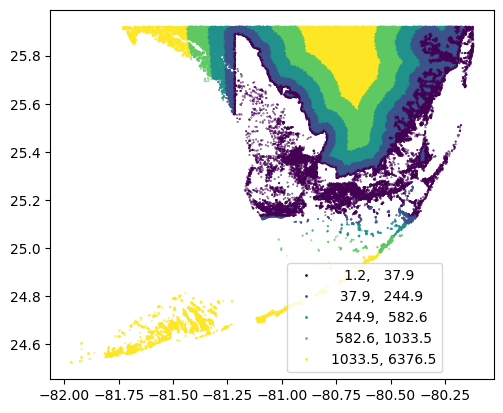

In [57]:
Geodata1.sample(n = 100000).plot(column= 'dist_near_km', 
             scheme="Quantiles", k = 5,
            #scheme = "user_defined", k = 5,
            #classification_kwds = {'bins':[0, 1, 2, 12]},
             legend = True , markersize= 0.1,
             legend_kwds = { 'loc':'lower right', 
                            'bbox_to_anchor':(0.9, 0.0), 
                            'fmt':'{:.1f}',
                            'markerscale': 0.2, 
                            'title_fontsize':'large', 
                            'fontsize':'medium'} ) 

<Axes: >

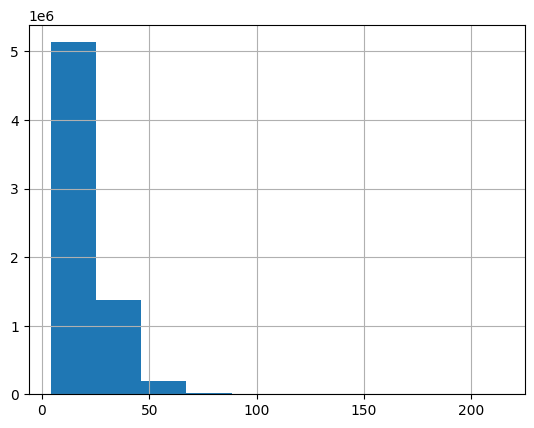

In [58]:
Geodata1['cate1tot'].hist()

<Axes: >

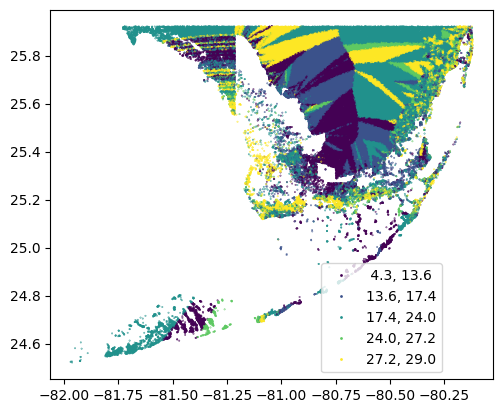

In [62]:
Geodata1.loc[ Geodata1['cate1tot'] > 29, 'cate1tot' ] = 29
Geodata1.sample(n = 100000).plot(column= 'cate1tot', 
             scheme="Quantiles", k = 5,
            #scheme = "user_defined", k = 5,
            #classification_kwds = {'bins':[0, 1, 2, 12]},
             legend = True , markersize= 0.1,
             legend_kwds = { 'loc':'lower right', 
                            'bbox_to_anchor':(0.9, 0.0), 
                            'fmt':'{:.1f}',
                            'markerscale': 0.2, 
                            'title_fontsize':'large', 
                            'fontsize':'medium'} ) 

<Axes: >

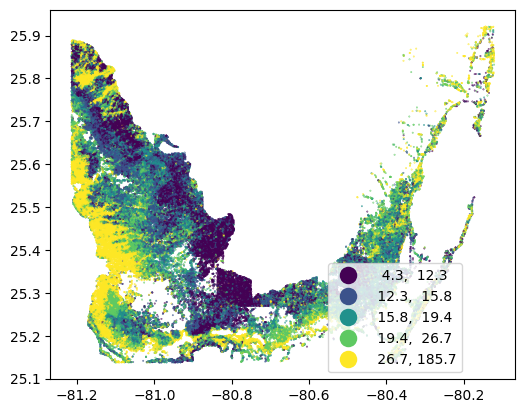

In [61]:
Geodata2.sample(n = 100000).plot(column= 'cate1tot', 
             scheme="Quantiles", k = 5,
            #scheme = "user_defined", k = 5,
            #classification_kwds = {'bins':[0, 1, 2, 12]},
             legend = True , markersize= 0.1,
             legend_kwds = { 'loc':'lower right', 
                            'bbox_to_anchor':(0.9, 0.0), 
                            'fmt':'{:.1f}',
                            'markerscale': 1.26, 
                            'title_fontsize':'large', 
                            'fontsize':'medium'} ) 

In [93]:
Geodata01[ 'dist_near_km' ] = 0
Geodata01.head()


,pointid,grid_code,category1,category2,category3,category4,category5,geometry,dist_near_km
0,38683802,1,-9999,-9999,-9999,-9999,-9999,POINT (-81.94986 24.58292),0
1,38691826,1,-9999,-9999,-9999,-9999,-9999,POINT (-81.95125 24.58264),0
2,38691827,2,-9999,-9999,-9999,-9999,-9999,POINT (-81.95097 24.58264),0
3,38691828,2,-9999,-9999,-9999,-9999,-9999,POINT (-81.95069 24.58264),0
4,38691829,3,-9999,-9999,-9999,-9999,-9999,POINT (-81.95042 24.58264),0


In [94]:

Geodata2['dist_near_km' ] = 0
Geodata2.head()

,pointid,grid_code,category1,category2,category3,category4,category5,geometry,x,y,cate1tot,cate2tot,cate3tot,cate4tot,cate5tot,dist_near_km
285008,21287865,2,10,14,17,21,21,POINT (-81.14264 25.18486),-81.142639,25.184861,16.56168,20.56168,23.56168,27.56168,27.56168,0
285009,21287866,3,10,14,17,21,21,POINT (-81.14236 25.18486),-81.142361,25.184861,19.84252,23.84252,26.84252,30.84252,30.84252,0
285010,21287867,4,10,14,17,21,21,POINT (-81.14208 25.18486),-81.142083,25.184861,23.12336,27.12336,30.12336,34.12336,34.12336,0
285011,21287868,4,10,14,18,21,21,POINT (-81.14181 25.18486),-81.141806,25.184861,23.12336,27.12336,31.12336,34.12336,34.12336,0
285012,21287869,4,10,14,18,21,21,POINT (-81.14153 25.18486),-81.141528,25.184861,23.12336,27.12336,31.12336,34.12336,34.12336,0


In [77]:
Geodata1[ ['pointid', 'cate1tot', 'dist_near_km' ] ].head()
Geodata1.columns

Index(['pointid', 'grid_code', 'category1', 'category2', 'category3',
       'category4', 'category5', 'geometry', 'x', 'y', 'cate1tot', 'cate2tot',
       'cate3tot', 'cate4tot', 'cate5tot', 'nnidx', 'dist_near',
       'dist_near_km'],
      dtype='object')

In [61]:
f"dist_near{2+1}" 
#column_names2 = [ 'cate1tot', 'cate2tot', 'cate3tot', 'cate4tot', 'cate5tot' ]
#column_names2[2]
Geodata0

,pointid,grid_code,category1,category2,category3,category4,category5,geometry,x,y,cate1tot,cate2tot,cate3tot,cate4tot,cate5tot
0,38683802,1,0,0,0,0,0,POINT (-81.94986 24.58292),-81.949861,24.582917,3.28084,3.28084,3.28084,3.28084,3.28084
1,38691826,1,0,0,0,0,0,POINT (-81.95125 24.58264),-81.951250,24.582639,3.28084,3.28084,3.28084,3.28084,3.28084
2,38691827,2,0,0,0,0,0,POINT (-81.95097 24.58264),-81.950972,24.582639,6.56168,6.56168,6.56168,6.56168,6.56168
3,38691828,2,0,0,0,0,0,POINT (-81.95069 24.58264),-81.950694,24.582639,6.56168,6.56168,6.56168,6.56168,6.56168
4,38691829,3,0,0,0,0,0,POINT (-81.95042 24.58264),-81.950417,24.582639,9.84252,9.84252,9.84252,9.84252,9.84252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9427484,175268,10,0,0,0,0,2,POINT (-80.12236 25.91542),-80.122361,25.915417,32.80840,32.80840,32.80840,32.80840,34.80840
9427485,175269,9,0,0,0,0,0,POINT (-80.12208 25.91542),-80.122083,25.915417,29.52756,29.52756,29.52756,29.52756,29.52756
9427486,175270,7,0,0,0,0,0,POINT (-80.12181 25.91542),-80.121806,25.915417,22.96588,22.96588,22.96588,22.96588,22.96588
9427487,175271,6,0,0,0,0,1,POINT (-80.12153 25.91542),-80.121528,25.915417,19.68504,19.68504,19.68504,19.68504,20.68504


In [115]:
fp = "./data/dem30_sfl_point.shp"
Geodata0 = read_dataframe(fp)
print( Geodata0.columns )

Geodata0['x'] = Geodata0.geometry.get_coordinates().x
Geodata0['y'] = Geodata0.geometry.get_coordinates().y


#Geodata0 = Geodata0.sample( n = 100000)
Geodata01 = Geodata0.copy()





Geodata0.loc[ Geodata0[  'category1'] < 0 ,  'category1' ] = 0
Geodata0.loc[ Geodata0[  'category2'] < 0 ,  'category2' ] = 0
Geodata0.loc[ Geodata0[  'category3'] < 0 ,  'category3' ] = 0
Geodata0.loc[ Geodata0[  'category4'] < 0 ,  'category4' ] = 0
Geodata0.loc[ Geodata0[  'category5'] < 0 ,  'category5' ] = 0

Geodata0['cate1tot'] = Geodata0['category1'] + Geodata0['grid_code'] * 3.28084
Geodata0['cate2tot'] = Geodata0['category2'] + Geodata0['grid_code'] * 3.28084
Geodata0['cate3tot'] = Geodata0['category3'] + Geodata0['grid_code'] * 3.28084
Geodata0['cate4tot'] = Geodata0['category4'] + Geodata0['grid_code'] * 3.28084
Geodata0['cate5tot'] = Geodata0['category5'] + Geodata0['grid_code'] * 3.28084

Index(['pointid', 'grid_code', 'category1', 'category2', 'category3',
       'category4', 'category5', 'geometry'],
      dtype='object')


In [116]:
column_names = [ 'category1', 'category2', 'category3', 'category4', 'category5' ]
column_names2 = [ 'cate1tot', 'cate2tot', 'cate3tot', 'cate4tot', 'cate5tot' ]


idx = 0
for columni in column_names:
    print( columni )
    Geodata1 = Geodata0[ Geodata0[ columni ] <= 0 ]
    Geodata2 = Geodata0[ Geodata0[ columni ] > 0 ]

    coords_gdf1 = np.array(list( Geodata1.geometry.apply(lambda geom: (geom.y, geom.x))))
    coords_gdf2 = np.array(list( Geodata2.geometry.apply(lambda geom: (geom.y, geom.x))))

    tree = BallTree(coords_gdf2, metric='haversine')
    distances, indices = tree.query(coords_gdf1, k=1)
    text0 = 'nnidx'
    colnamei0 = f"{text0}{idx}" 
    colnamei1 = f"dist_near{idx+1}" 
    # Add the distance and index of the nearest neighbor to gdf1
    Geodata1[colnamei0] = indices.flatten()
    Geodata1[colnamei1] = distances.flatten() * 6371
    # Convert distance from radians to kilometers (assuming Earth radius of 6,371 km)
    # If you need the actual data from gdf2, you can merge or map it based on the index
    # For example, to add the geometry of the nearest neighbor in gdf2 to gdf1
    text1 = 'cate'
    text2 = 'tot'
    colnamei = f"{text1}{idx+1}{text2}" 
    column2i = column_names2[ idx ]
    
    print( columni, " ", column2i )
    print( colnamei0, " ", colnamei1, " ", colnamei )

    Geodata1[colnamei] = Geodata1[colnamei0].apply(lambda x: Geodata2.iloc[x][ column2i ])
    Geodata1.loc[ Geodata1[ colnamei ] > 29, colnamei ] = 29 # storm surge 500 Return Period (Years) is 21.20 feet high

    resulti = pd.concat( [ Geodata1, Geodata2 ] )
    Geodata01 = pd.merge( Geodata01, resulti[ ['pointid', colnamei, colnamei1 ] ], on='pointid', how='right')
    Geodata01.loc[ ( Geodata01[ 'y'  ] > 25.4 )&(   Geodata01[ colnamei1  ] > 20 )  ,  colnamei ] = 0

    print( Geodata01.columns )
    idx = idx + 1


category1
category1   cate1tot
nnidx0   dist_near1   cate1tot
Index(['pointid', 'grid_code', 'category1', 'category2', 'category3',
       'category4', 'category5', 'geometry', 'x', 'y', 'cate1tot',
       'dist_near1'],
      dtype='object')
category2
category2   cate2tot
nnidx1   dist_near2   cate2tot
Index(['pointid', 'grid_code', 'category1', 'category2', 'category3',
       'category4', 'category5', 'geometry', 'x', 'y', 'cate1tot',
       'dist_near1', 'cate2tot', 'dist_near2'],
      dtype='object')
category3
category3   cate3tot
nnidx2   dist_near3   cate3tot
Index(['pointid', 'grid_code', 'category1', 'category2', 'category3',
       'category4', 'category5', 'geometry', 'x', 'y', 'cate1tot',
       'dist_near1', 'cate2tot', 'dist_near2', 'cate3tot', 'dist_near3'],
      dtype='object')
category4
category4   cate4tot
nnidx3   dist_near4   cate4tot
Index(['pointid', 'grid_code', 'category1', 'category2', 'category3',
       'category4', 'category5', 'geometry', 'x', 'y', 'cate1

In [118]:
Geodata01.shape

(9427489, 20)

<Axes: >

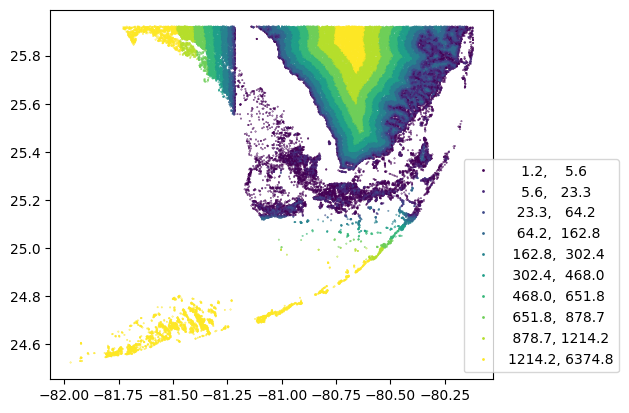

In [119]:
k = 2
dist_k       = f'dist_near{k}'
Geodata01.sample(n = 100000).plot(column= dist_k, 
             scheme="Quantiles", k = 10,
            #scheme = "user_defined", k = 5,
            #classification_kwds = {'bins':[0, 1, 2, 12]},
             legend = True , markersize= 0.1,
             legend_kwds = { 'loc':'lower right', 
                            'bbox_to_anchor':(1.3, 0.0), 
                            'fmt':'{:.1f}',
                            'markerscale': 0.2, 
                            'title_fontsize':'large', 
                            'fontsize':'medium'} ) 

<Axes: >

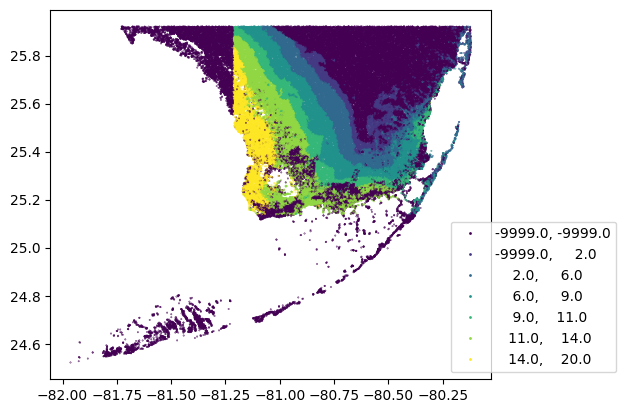

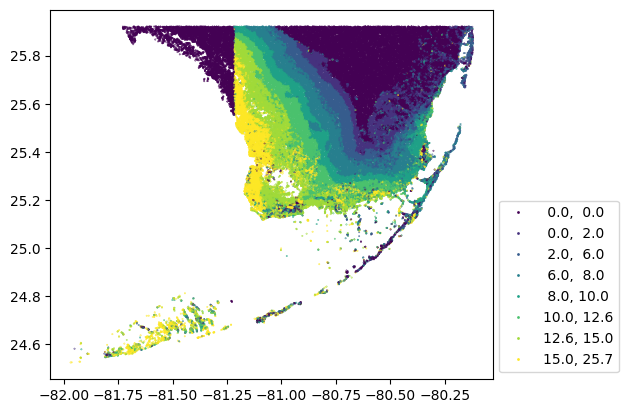

In [123]:

k = 3
columnk      = f'category{k}_2'
catektotal   = f'cate{k}tot' 
catek        = f'category{k}'

dist_k       = f'dist_near{k}'


Geodata01[ columnk ] = Geodata01[ catektotal ] - ( Geodata01[ 'grid_code' ] ) * 3.28084
Geodata01.loc[ ( Geodata01[ columnk  ] < 0 )  ,  columnk ] = 0

#Geodata01.loc[ ( Geodata01[ 'y'  ] > 25.4 )&(   Geodata01[ dist_k  ] > 48 )  ,  columnk ] = 0

Geodata01.sample(n = 100000).plot(column= catek, 
             scheme="Quantiles", k = 10,
            #scheme = "user_defined", k = 5,
            #classification_kwds = {'bins':[0, 1, 2, 12]},
             legend = True , markersize= 0.1,
             legend_kwds = { 'loc':'lower right', 
                            'bbox_to_anchor':(1.3, 0.0), 
                            'fmt':'{:.1f}',
                            'markerscale': 0.2, 
                            'title_fontsize':'large', 
                            'fontsize':'medium'} ) 


Geodata01.sample(n = 100000).plot(column= columnk, 
             scheme="Quantiles", k = 10,
            #scheme = "user_defined", k = 5,
            #classification_kwds = {'bins':[0, 1, 2, 12]},
             legend = True , markersize= 0.1,
             legend_kwds = { 'loc':'lower right', 
                            'bbox_to_anchor':(1.3, 0.0), 
                            'fmt':'{:.1f}',
                            'markerscale': 0.2, 
                            'title_fontsize':'large', 
                            'fontsize':'medium'} ) 

In [129]:
Geodata01 = Geodata01.drop( columns=['category1_2', 'category2_2', 'category3_2'] )
Geodata01.head()

,pointid,grid_code,category1,category2,category3,category4,category5,geometry,x,y,cate1tot,dist_near1,cate2tot,dist_near2,cate3tot,dist_near3,cate4tot,dist_near4,cate5tot,dist_near5
0,38683802,1,-9999,-9999,-9999,-9999,-9999,POINT (-81.94986 24.58292),-81.949861,24.582917,17.84252,6099.246437,21.84252,6099.246437,24.84252,6099.246437,29.0,6099.246437,29.0,6099.246437
1,38691826,1,-9999,-9999,-9999,-9999,-9999,POINT (-81.95125 24.58264),-81.951250,24.582639,17.84252,6106.744923,21.84252,6106.744923,24.84252,6106.744923,29.0,6106.744923,29.0,6106.744923
2,38691827,2,-9999,-9999,-9999,-9999,-9999,POINT (-81.95097 24.58264),-81.950972,24.582639,17.84252,6105.410164,21.84252,6105.410164,24.84252,6105.410164,29.0,6105.410164,29.0,6105.410164
3,38691828,2,-9999,-9999,-9999,-9999,-9999,POINT (-81.95069 24.58264),-81.950694,24.582639,17.84252,6104.075561,21.84252,6104.075561,24.84252,6104.075561,29.0,6104.075561,29.0,6104.075561
4,38691829,3,-9999,-9999,-9999,-9999,-9999,POINT (-81.95042 24.58264),-81.950417,24.582639,17.84252,6102.741115,21.84252,6102.741115,24.84252,6102.741115,29.0,6102.741115,29.0,6102.741115


In [130]:
Geodata_select = gpd.GeoDataFrame( Geodata01 , geometry = 'geometry', crs="EPSG:4326")
write_dataframe( Geodata_select, path= r'./data/dem30_sfl_poi_updated.shp', driver='ESRI Shapefile' )